# **Greedy Coloring and the Coloring Number**
Wojciech Jurewicz
250382

## 1. Introduction to Graph Coloring

**Graph coloring** is a special case of graph labeling; it is an assignment of labels traditionally called "colors" to elements of a graph subject to certain constraints. In its simplest form, it is a way of coloring the vertices of a graph such that no two adjacent vertices are of the same color.

The **chromatic number** $\chi(G)$ is the smallest number of colors needed to color graph $G$.

### The Greedy Coloring Algorithm
Finding the minimal coloring is an NP-hard problem. However, there is a simple heuristic called **Greedy Coloring**.

**Algorithm:**
1. Order the vertices $v_1, v_2, ..., v_n$.
2. For $i$ from 1 to $n$, assign to $v_i$ the smallest positive integer (color) that is not already assigned to any of its neighbors in the set $\{v_1, ..., v_{i-1}\}$.

**Properties:**
- The result depends heavily on the vertex ordering.
- It always produces a valid coloring.
- It is not guaranteed to find the minimal $\chi(G)$.
- In the worst case, it can perform arbitrarily poorly compared to the optimal, but for many graphs, it works reasonably well.

### Upper Bound Theorem
The Greedy algorithm uses at most $\Delta(G) + 1$ colors, where $\Delta(G)$ is the maximum degree of the graph.
This follows because when we color a vertex $v$, at most $\Delta(G)$ neighbors can be already colored, so there is always an available color among the first $\Delta(G) + 1$ colors.

### Time Complexity
The Greedy Coloring algorithm runs in $O(n + m)$ time, where $n$ is the number of vertices and $m$ is the number of edges.
- We iterate through each vertex once: $O(n)$
- For each vertex, we check its neighbors: total $O(m)$ across all vertices

### Practical Applications
Graph coloring has many real-world applications:
- **Map Coloring**: Adjacent regions on a map need different colors
- **Frequency Assignment**: Adjacent cell towers need different frequencies to avoid interference
- **Exam Scheduling**: Exams taken by the same students cannot be scheduled simultaneously

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set seed for reproducibility
random.seed(42)

## 2. Implementation

In [37]:
def greedy_coloring(G, order=None):
    if order is None:
        order = list(G.nodes())
    
    coloring = {}
    
    for node in order:
        # Get colors of already colored neighbors
        neighbor_colors = {coloring[neighbor] for neighbor in G.neighbors(node) if neighbor in coloring}
        
        # Find first available color (starting from 0)
        color = 0
        while color in neighbor_colors:
            color += 1
            
        coloring[node] = color
        
    num_colors = max(coloring.values()) + 1 if coloring else 0
    return coloring, num_colors

def draw_colored_graph(G, coloring, title="Graph Coloring"):
    num_colors = max(coloring.values()) + 1
    coloring_order = list(coloring.keys())
    
    # Create a color map list directly from the coloring dict
    node_colors = [coloring[node] for node in G.nodes()]
    
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_color='black')
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    plt.title(f"{title}\nColors Used: {num_colors}\nOrder: {coloring_order}")
    plt.axis('off')
    plt.show()

## 3. Examples and Verification

### Example 1: Cycle Graph ($C_5$)
A cycle graph with 5 vertices ($C_5$) requires 3 colors because it is an odd cycle.

Colors used for C5: 3


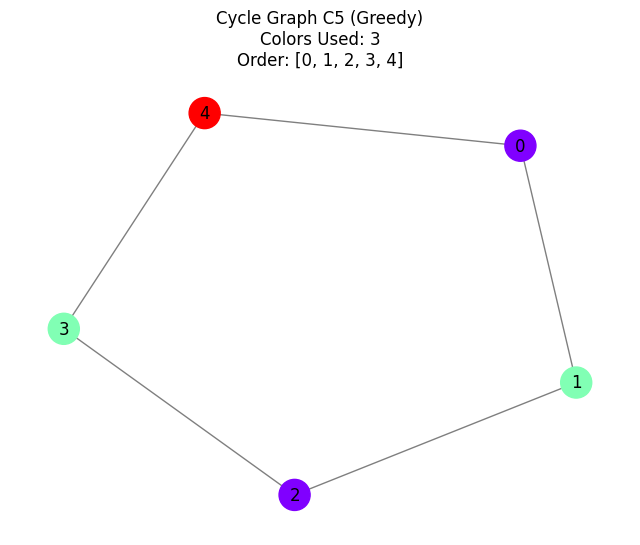

In [38]:
G_cycle = nx.cycle_graph(5)

coloring_c, num_c = greedy_coloring(G_cycle)

print(f"Colors used for C5: {num_c}")
draw_colored_graph(G_cycle, coloring_c, "Cycle Graph C5 (Greedy)")

### Example 2: Complete Graph ($K_5$)
In a complete graph, every vertex is connected to every other vertex. Therefore, no two vertices can share a color. We expect $\chi(K_5) = 5$.

Colors used for K5: 5


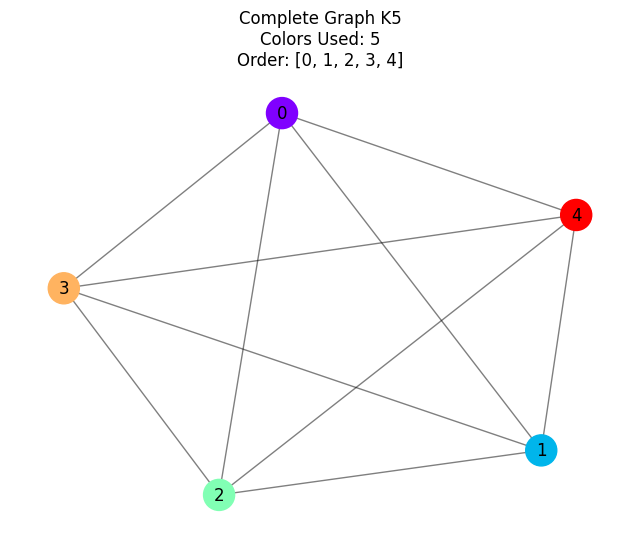

In [39]:
G_complete = nx.complete_graph(5)
coloring_k, num_k = greedy_coloring(G_complete)

print(f"Colors used for K5: {num_k}")
draw_colored_graph(G_complete, coloring_k, "Complete Graph K5")

### Example 3: Bipartite Graph
A bipartite graph can always be colored with 2 colors (if it has at least one edge).

Colors used for Bipartite: 2


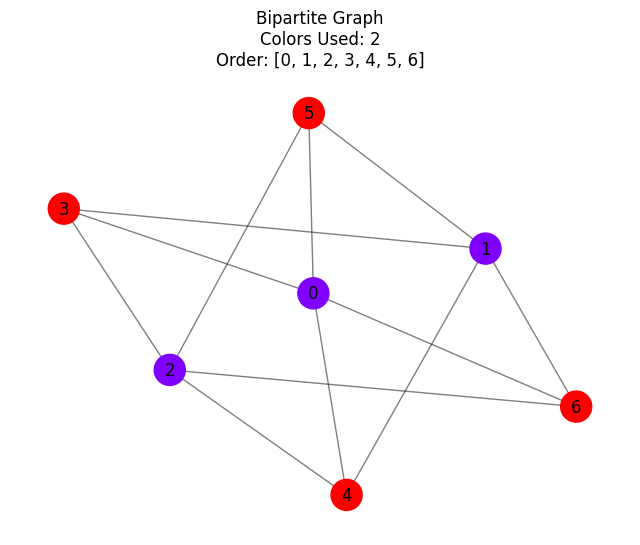

In [67]:
G_bipartite = nx.bipartite.random_graph(3, 4, 0.7)

coloring_b, num_b = greedy_coloring(G_bipartite)

print(f"Colors used for Bipartite: {num_b}")
draw_colored_graph(G_bipartite, coloring_b, "Bipartite Graph")

## 4. The Importance of Vertex Ordering

One of the biggest weaknesses of the Greedy algorithm is its sensitivity to the order of vertices. A "bad" order can result in many more colors than necessary.

Strategies to improve this include chaning the coloring sequence:
1. **Largest Degree First (Welsh-Powell)**: Color high-degree nodes first. They are the most constrained.
2. **Random Order**: Sometimes shuffling helps break bad patterns.

Let's test this on a random graph.

Colors used (Default Order): 4
Colors used (Random Order): 4
Colors used (Largest Degree First): 3


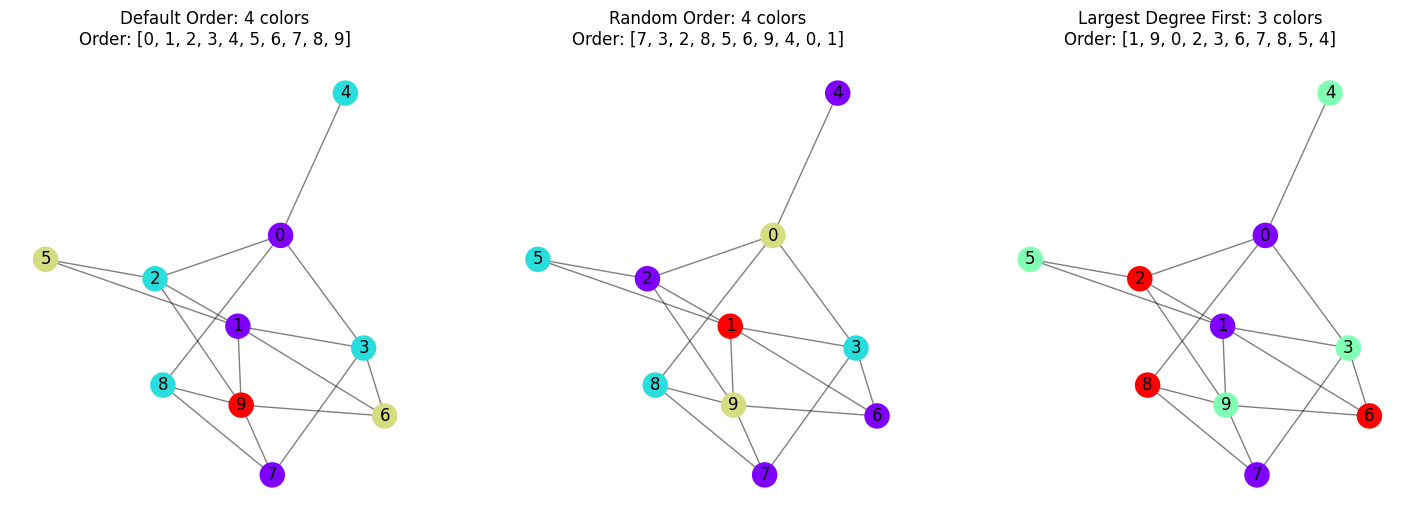

In [ ]:
# Generate a random graph
G_random = nx.gnp_random_graph(10, 0.3, seed=42)

# 1. Default component order (0..n)
colors_default, count_default = greedy_coloring(G_random)

# 2. Random Shuffle
nodes_shuffled = list(G_random.nodes())
random.shuffle(nodes_shuffled)
colors_random, count_random = greedy_coloring(G_random, order=nodes_shuffled)

# 3. Largest Degree First
nodes_ldf = sorted(G_random.nodes(), key=lambda x: G_random.degree(x), reverse=True)
colors_ldf, count_ldf = greedy_coloring(G_random, order=nodes_ldf)

print(f"Colors used (Default Order): {count_default}")
print(f"Colors used (Random Order): {count_random}")
print(f"Colors used (Largest Degree First): {count_ldf}")

def draw_subplot(G, coloring, title, ax):
    coloring_order = list(coloring.keys())
    pos = nx.spring_layout(G, seed=42)
    node_colors = [coloring[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.rainbow, node_size=300, ax=ax)
    nx.draw_networkx_labels(G, pos, font_color='black', ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    ax.set_title(title + f"\nOrder: {coloring_order}")
    ax.axis('off')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
draw_subplot(G_random, colors_default, f"Default Order: {count_default} colors", ax1)
draw_subplot(G_random, colors_random, f"Random Order: {count_random} colors", ax2)
draw_subplot(G_random, colors_ldf, f"Largest Degree First: {count_ldf} colors", ax3)
plt.show()

## 5. The Coloring Number

The **coloring number** $col(G)$ of a graph $G$ is a concept closely related to the chromatic number $\chi(G)$ and greedy coloring. It provides an upper bound on the chromatic number.

### Definition
The coloring number $col(G)$ is defined as:
$$ col(G) = 1 + \max_{H \subseteq G} \delta(H) $$
where $H$ ranges over all induced subgraphs of $G$, and $\delta(H)$ is the minimum degree of subgraph $H$.

Equivalently, $col(G) = k + 1$ where $k$ is the **degeneracy** of the graph (the largest minimum degree over all subgraphs).

### Key Relationships
The following inequalities hold:
$$ \chi(G) \le col(G) \le \Delta(G) + 1 $$

This means:
- The chromatic number is bounded above by the coloring number
- The coloring number is bounded above by the maximum degree plus one
- For many sparse graphs, $col(G)$ is much smaller than $\Delta(G) + 1$

### Szekeres-Wilf Ordering (Degeneracy Ordering)
The ordering of vertices used to achieve a coloring with at most $col(G)$ colors is often called the **degeneracy ordering** or **smallest degree last** ordering.

**Algorithm to find the ordering:**
1. Find a vertex $v$ with the minimum degree in the current graph.
2. Remove $v$ and add it to the *front* of the ordering list (or stack).
3. Repeat until the graph is empty.

**Step-by-step Example:**
Consider a simple path graph $P_4$ with vertices $\{0, 1, 2, 3\}$ and edges $\{(0,1), (1,2), (2,3)\}$:
- Step 1: Remove vertex 0 (degree 1, minimum) → removal order: [0]
- Step 2: Remove vertex 3 (degree 1, minimum) → removal order: [0, 3]
- Step 3: Remove vertex 1 (degree 1, minimum) → removal order: [0, 3, 1]
- Step 4: Remove vertex 2 (degree 0, only one left) → removal order: [0, 3, 1, 2]
- Coloring order (reverse): [2, 1, 3, 0]
- Maximum minimum degree seen: 1, so $col(G) = 2$

When the greedy coloring algorithm is run with this degeneracy ordering, it guarantees using at most $col(G)$ colors.


In [43]:
def find_degeneracy_ordering(G):
    H = G.copy()
    removal_order = []
    max_min_degree = 0
    
    while H.number_of_nodes() > 0:
        # Find vertex with minimum degree
        degrees = dict(H.degree())
        min_degree_node = min(degrees, key=degrees.get)
        min_degree = degrees[min_degree_node]
        
        # Update the max min-degree seen so far (this is degeneracy)
        max_min_degree = max(max_min_degree, min_degree)
        
        # Remove node and add to ordering
        removal_order.append(min_degree_node)
        H.remove_node(min_degree_node)
        
    # The coloring order is the reverse of the removal order
    coloring_order = removal_order[::-1]
    
    return coloring_order, max_min_degree + 1


### Example 5: Comparison on a Random Graph
Let's compare the standard greedy coloring (default order) with the degeneracy ordering on a random graph.


Coloring Number col(G): 3
Greedy (Default Order): 4 colors
Greedy (Degeneracy Order): 3 colors


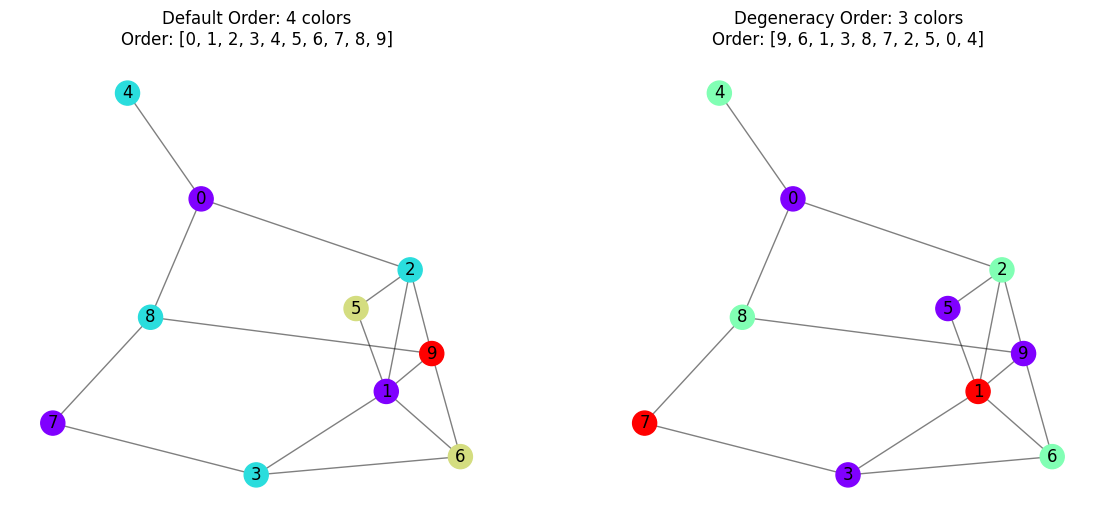

In [44]:
# Create a random graph for demonstration
G_demo = nx.gnp_random_graph(10, 0.25, seed=42)

# Calculate Coloring Number and Ordering
deg_order, col_number = find_degeneracy_ordering(G_demo)

print(f"Coloring Number col(G): {col_number}")

# Run Greedy with different orderings
colors_rand, k_rand = greedy_coloring(G_demo, list(G_demo.nodes()))
colors_deg, k_deg = greedy_coloring(G_demo, deg_order)

print(f"Greedy (Default Order): {k_rand} colors")
print(f"Greedy (Degeneracy Order): {k_deg} colors")

# Reuse draw_subplot from previous cells if available, otherwise simplified drawing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
draw_subplot(G_demo, colors_rand, f"Default Order: {k_rand} colors", ax1)
draw_subplot(G_demo, colors_deg, f"Degeneracy Order: {k_deg} colors", ax2)
plt.show()

## 6. Conclusion

The Greedy Coloring algorithm is a fast and simple approach with $O(n+m)$ time complexity. Its efficiency is highly dependent on vertex ordering.

Summary:
- **Upper Bound**: Greedy uses at most $\Delta(G) + 1$ colors
- **Coloring Number**: With degeneracy ordering, greedy uses at most $col(G)$ colors
- **Relationship**: $\chi(G) \le col(G) \le \Delta(G) + 1$

While finding the true Chromatic Number $\chi(G)$ is NP-hard, $col(G)$ is computable in $O(n + m)$ time and provides a strong guarantee for greedy coloring.